株式市場を理解する1つの良い方法は過去の株価を取得してチャートを描いてみたり、統計分析をしてみることです。株価の動きを経済変数と比較してみるなどということも大事です。このような環境は海外のほうが日本よりも充実しています。

　Python3を用いてデータをダウンロードするためには、jupyter notebookがお勧めです。jupyter notebookのインストールについては[Python3ではじめるシステムトレード：Jupyter notebookのインストール](https://qiita.com/innovation1005/items/2f433d6d859f075033a7)を参考にしてください。

# 注1：
　2017年春ごろからフリーでダウンロードできる株価データが世界的に減少する傾向が続いていました。Yahoo Financeはフリーで株価を提供してくれる重要なサイトでしたが、2017年5月ごろよりサービスに支障をきたすようになりました。
 
　しかし2017年年末ごろより、まだ、公式には発表されていませんが、データの提供を再開しているようです。Yahooはサービスの再開に際してデータを修正したようです。大体リターンが下がる傾向にありますが、上がったものもあります。以前から言われているようにYahooのデータは必ずしも信用できるとは限らないということです(これはyahooのデータに限りません。どのデータソースも同じです)。しかし、今回改善されたようです(チェックはしてません)。あくまでイメージです。  

2021/11/9に一部のグラフをアップデート  

主なグラフを2022/1/28日にアップデート

2022/12/28 yahoo finance はAPIのサービスを中止しています。   
 yfinance(https://pypi.org/project/yfinance/)  
 yahoofinancials(https://pypi.org/project/yahoofinancials/)
 yahoo_fin(http://theautomatic.net/yahoo_fin-documentation/)  
の使用をお勧めします。

yfinanceのインストール
```Python
pip install yfinance
```

場合によっては以下のメッセージが出ますが、一応動きます。
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/e38df0dc-32a4-8a4a-4f9e-f67ddbbb95c0.png)

yahoofinancialsのインストール
```Python
pip install yahoofinancials
```

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt #描画ライブラリ
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

check
ダウンロードの結果の比較

In [2]:
ticker = yf.Ticker('usmv')
tsd = ticker.history(period="16y")
tsd.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2011-10-20 00:00:00-04:00,19.970412,20.009865,19.804716,20.009865,4200,0.0,0.0,0.0
2011-10-21 00:00:00-04:00,20.254465,20.254465,20.254465,20.254465,100,0.0,0.0,0.0


In [3]:
yahoo_financials = YahooFinancials('USMV')
data = yahoo_financials.get_historical_price_data(start_date='2010-01-01', 
                                                  end_date='2023-12-31', 
                                                  time_interval='weekly')
tsd_df = pd.DataFrame(data['USMV']['prices'])
tsd_df = tsd_df.drop('date', axis=1).set_index('formatted_date')
tsd_df.head(2)

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2011-10-17,25.67,25.100000,25.309999,25.67,4300,20.254467
2011-10-24,26.07,25.459999,25.670000,26.02,8700,20.530628


yahoo! financeのhistrical dataの取得　画面コピー
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/a14550a0-32cc-4b0d-6b64-44555a7d0107.png)

 日付もAdjysted closeもcloseも異なります。yfinanceのCloseはyahoo! financeのadj closeのようです。以後簡単なyfinanceを使います。

# US yahoo！ financeのデータ構成

- Open:始値
- High:高値
- Low:安値
- Close:終値　-　分割調整後
- Volume:出来高
- Adj Close:配当込み分割調整後株価

# 株価データの可視化

## 代表的な米国ETF(上場投資信託)

　ETFとは上場投資信託のことで手数料の点で株式と同じ手数料で売買ができるために、通常の投資信託よりも費用の面で有利です。

　では実際にダウンロードしてみましょう。

<AxesSubplot:xlabel='Date'>

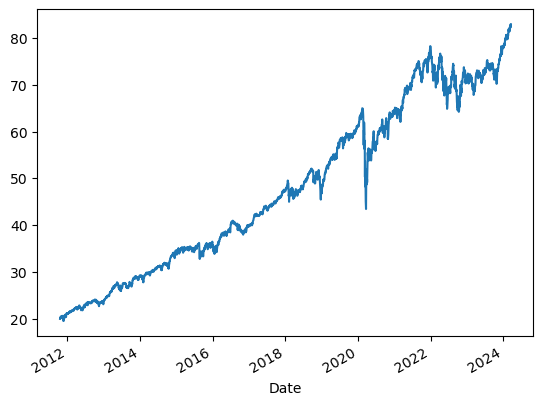

In [4]:
ticker = yf.Ticker('usmv')
tsd = ticker.history(period="16y")
tsd.Close.plot()

　ダウンロードした株価は米国の上場投資信託(ETF)の~~リスクパリティ~~-最小分散ポートフォリオ戦略を用いたusmvです。

　このETFは安定した収益の獲得を目指し、最小分散ポートフォリオというアルゴリズムを用いて運用されています。

https://www.bloomberg.co.jp/quote/USMV:US

　ポートフォリの詳細はつぎURLよりExcel形式でダウンロード可能です。
https://www.blackrock.com/us/individual/products/239695/ishares-msci-usa-minimum-volatility-etf


### ダウジョーンズ

<AxesSubplot:xlabel='Date'>

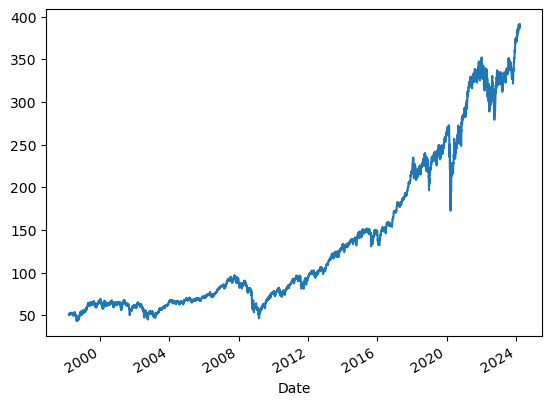

In [5]:
ticker = yf.Ticker('dia')
tsd = ticker.history(period="26y")
tsd.Close.plot()

### ナスダック100

<AxesSubplot:xlabel='Date'>

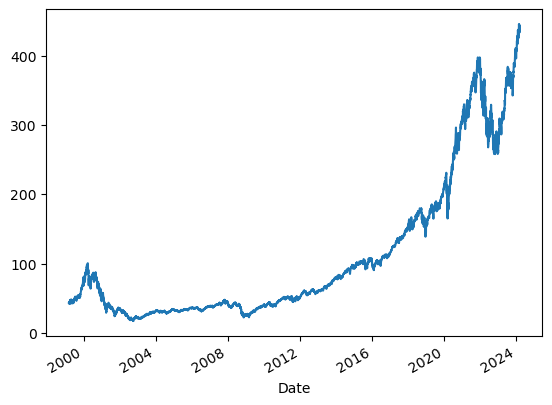

In [6]:
ticker = yf.Ticker('qqq')
tsd = ticker.history(period="26y")
tsd.Close.plot()

　QQQはInvescoが運用するナスダック100連動のETFですが、そのポートフォリオの詳細はつぎのURLよりExcel形式でダウンロード可能です。

https://www.invesco.com/us/financial-products/etfs/holdings?ticker=QQQ

### 日経平均株価
　日本の代表的な株価指数である日経平均株価(日経225）もダウンロード可能です。

<AxesSubplot:xlabel='Date'>

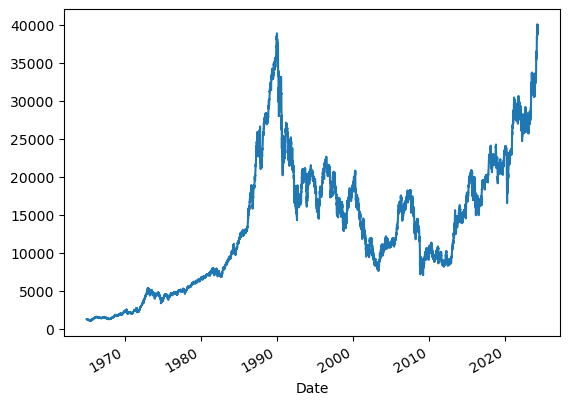

In [7]:
ticker = yf.Ticker('^N225')
tsd = ticker.history(period="100y")
tsd.Close.plot()

<AxesSubplot:xlabel='Date'>

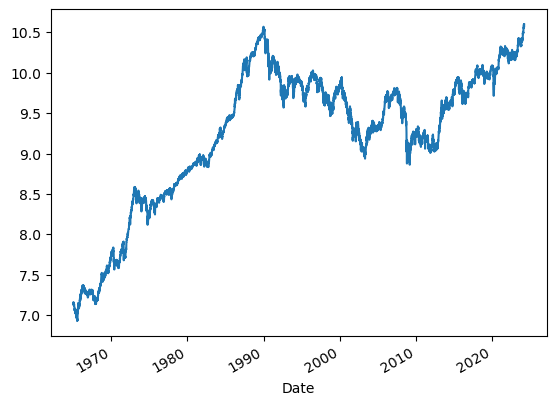

In [8]:
import numpy as np
ticker = yf.Ticker('^N225')
tsd = ticker.history(period="100y")
np.log(tsd.Close).plot()

　アベノミクス(2013年)以降の指数をダウンロードしてみましょう。

<AxesSubplot:xlabel='Date'>

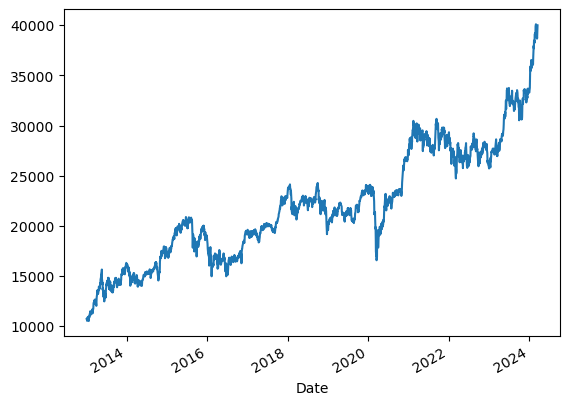

In [9]:
tsd.loc['2013':,'Close'].plot()

## 米国株投資の日本円でリターン

最近、日本株が安定した値上がりを示しているために、米国株とのパフォーマンスの比較が出ます。多くは日経225の日本円でのリターンと米国株のドル建てのリターンを比べています。ここでは米国株投資を日本円のリターンに直して示してみます。

### ナスダック


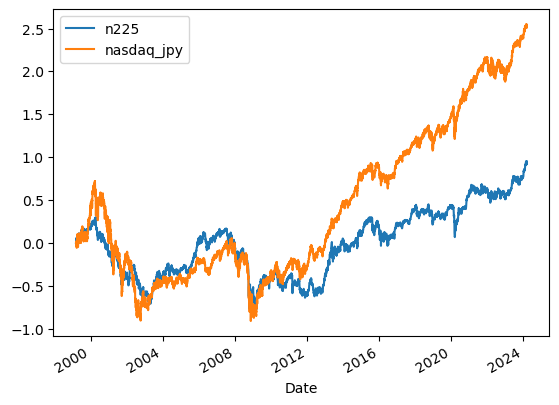

In [65]:
# QQQとJPY/USDのデータを取得
qqq = yf.Ticker('QQQ').history(period="26y")['Close']
jpy = yf.Ticker('JPY=X').history(period="26y")['Close']

# データフレームを作成し、日付をインデックスとして結合
df = pd.DataFrame({'QQQ_USD': qqq, 'JPY_USD': jpy})

# NaN値を処理（前方の値で穴埋め）
df.fillna(method='ffill', inplace=True)

# QQQの価格を日本円に換算
df['QQQ_JPY']= (df['QQQ_USD'] * df['JPY_USD'])
df=df.dropna()
lenqqq=len(qqq)
n225 = yf.Ticker('^N225').history(period="100y").Close
np.log(n225.loc["1999/3/10":]/n225.loc["1999/3/10"]).plot(label='n225')
p0=df.QQQ_JPY.loc["1999/3/10"]
np.log(df.QQQ_JPY/p0[0]).plot(label='nasdaq_jpy') 
plt.legend()
plt.show()

## 主な株価指数の構成銘柄
### 代表的な[ナスダック100指数](https://ja.wikipedia.org/wiki/%E3%83%8A%E3%82%B9%E3%83%80%E3%83%83%E3%82%AF100%E6%8C%87%E6%95%B0)を構成する銘柄

　アメリカ経済を牽引する銘柄群です。

In [10]:
NDX=pd.read_csv("nasdaq.csv",header=None)
NDX.head()

,0
0,ADP
1,ABNB
2,GOOGL
3,GOOG
4,AMZN


In [11]:
for x in NDX.iloc[:,0]:
    ticker = yf.Ticker(x)
    tsd = ticker.history(period="1y")
len(NDX)

100

nasdaq.csvは自分で作ることができます。https://en.wikipedia.org/wiki/Nasdaq-100
にナスダック100のリストがありますから、それをエクセルにペーストして、株価コードだけをcsvファイルとして落とせば完了です。1年に一度、見直しがあるので、入れ替えは頻繁に起こると思ってください。

### 代表的な[ダウ平均株価指数](https://ja.wikipedia.org/wiki/%E3%83%80%E3%82%A6%E5%B9%B3%E5%9D%87%E6%A0%AA%E4%BE%A1)採用銘柄

「ダウ平均」、「ニューヨーク・ダウ」、「ニューヨーク平均株価」などとして親しまれている当指数は、チャールズ・ダウにより考え出され、1884年から算出されています。発表当初は鉄道株が中心でした。19世紀末には変わりゆく経済の姿を受け、1896年から新たなダウ工業株平均の算出が始まりました。その後ダウ工業株30種平均株価を構成する銘柄は時代の流れに合わせて入れ替えが行われています。今現在もっとも古くから採用されている銘柄はエクソンモービルで1928年から採用されています。

現在の構成銘柄は、wikiのページから銘柄リストをエクセルにペーストしてティッカーの部分だけを残してdjia.csvファイルとして保存します。

In [12]:
DJIA=pd.read_csv("djia.csv",header=None)
DJIA.head()

,0
0,MMM
1,AXP
2,AMGN
3,AAPL
4,BA


In [13]:
for x in DJIA.iloc[:,0]:
    ticker = yf.Ticker(x)
    tsd = ticker.history(period="1y")
len(DJIA)

30

### [代表的なS&P株](https://en.wikipedia.org/wiki/S%26P_500)

現在の構成銘柄は、wikiのページから[銘柄リスト](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)をエクセルにペーストしてティッカーの部分だけを残してsp500.csvファイルとして保存します。

In [14]:
SP500=pd.read_csv("sp500.csv",header=None)
SP500.head()

,0
0,MMM
1,AOS
2,ABT
3,ABBV
4,ACN


In [15]:
for x in SP500.iloc[:,0]:
    ticker = yf.Ticker(x)
    tsd = ticker.history(period="1mo")
len(SP500)

501

### 代表的な株価指数ETF


In [16]:
ETF=['DIA','SPY','QQQ','IBB','XLV','IWM','EEM','EFA','XLP','XLY','ITB','XLU','XLF',
     'VGT','VT','FDN','IWO','IWN','IYF','XLK','XOP','USMV','BAB','GLD',
    'VNQ','SCHH','IYR','XLRE','AGG','BND','LQD','VCSH','VCIT','JNK']

### 代表的なバイオ・ヘルス株
代表的なバイオ・ヘルス株の銘柄を得るために代表的なバイオ株へ投資しているETFを参考に銘柄を絞り込みます。まず、IBBを参考にします。IBBのホームページに行きます。
https://www.ishares.com/us/products/239699/ishares-biotechnology-etf
つぎにholdingをクリックすると、投資銘柄リストをダウンロードできるボタンがあります。
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/c13a92ec-05c9-c837-b4c9-4efe5e02034a.png)
左下のDetailed Holdings and Analyticsのボタンを押すと関連ファイルがダウンロードホルダーにダウンロードできます。
IBB_holdings.csv
エクセルでファイルを開いてティカーコードだけを残して、IBB.csvとして保存します。


In [17]:
IBB=pd.read_csv("IBB.csv",header=None)
IBB.head()

,0
0,VRTX
1,REGN
2,AMGN
3,GILD
4,IQV


In [18]:
for x in IBB.iloc[:,0]:
    ticker = yf.Ticker(x)
    tsd = ticker.history(period="1mo")
len(IBB)

IMGN: No data found for this date range, symbol may be delisted


221



### 代表的な暗号通貨

https://finance.yahoo.com/cryptocurrencies

In [19]:
ccurrency=["BTC-USD","XRP-USD","ETH-USD","LTC-USD","BCH-USD","BNB-USD",
       "EOS-USD","USDT-USD","LINK-USD","TRX-USD","ADA-USD",
       "XLM-USD","XMR-USD","DASH-USD","NEO-USD","IOT-USD",
       "VEN-USD","ETC-USD","XEM-USD","ZEC-USD","XRB-USD","QTUM-USD",
       "BTG-USD","BAT-USD","DOGE-USD"]


|||
|:---|:---:|
|Bitcoin USD| BTC-USD
|Ripple USD |XRP-USD
|Ethereum USD| ETH-USD
|Litecoin USD| LTC-USD
|Bitcoin Cash / BCCUSD |BCH-USD
|Binance Coin USD| BNB-USD
|EOS USD| EOS-USD
|Tether USD |USDT-USD
|ChainLink USD |LINK-USD
|Tronix USD |TRX-USD
|Cardano USD |ADA-USD
|Stellar USD|XLM-USD
|Monero USD |XMR-USD
|DigitalCash USD| DASH-USD
|NEO USD |NEO-USD
|IOTA USD |IOT-USD
|Vechain USD| VEN-USD
|Ethereum Classic USD| ETC-USD
|NEM USD |XEM-USD
|ZCash USD| ZEC-USD
|Nano USD |XRB-USD
|QTUM USD |QTUM-USD
|Bitcoin Gold USD |BTG-USD
|Basic Attention Token USD| BAT-USD
|Dogecoin USD |DOGE-USD



さて、重要なことをまだ説明していません。それはデータを分析することで何が得られるのかという点です。多くの人は何か理論的な確証を得て効果的で効率の良い投資ができるのではと考えていませんか？実はそのような理論も事実もありません。あるのは株価の過去の動きのパターンを知ることができるということだけです。ではなぜパターンが大事なのでしょうか？それはあなた自身のリスク許容能力をつかむためです。株式を売らずに持ち続けることは簡単なことではありません。株価が下落すれば、すぐに売りたくなってしまいます。でもそれでは効率的な投資にはなりません。そこであなたがどの程度の下落に「どきどき」しないで耐えられるのかをまずつかむ必要があります。そしてそのレベルを、パターンを収益率/リスクで測ろうとしているのです。そして、それがつかめたら、同じパターンをもつ株をまず探して、そのリストから分散投資するための銘柄を選べばいいのです。そのために統計分析が必要なのです。決して、理論的な背景を探して、それをよりどころに投資をするからではありません。「知的ゲーム」は危険な「遊び」です。
